# 1- Import the packages

In [86]:
import pandas  as pd
import numpy   as np
import scipy, scipy.stats
import seaborn as sns
import statsmodels as sm
import statsmodels.stats.proportion as sp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

# 2- Import the Data

1st Dataset

In [31]:
total_no_of_cases = pd.read_csv(r'C:\Users\engma\Desktop\BST\DSO110-Final Group Project\DFT_Group\Original_Datasets_python\total_no_of_cases.csv')
total_no_of_cases.head()

,UID,iso2,iso3,code3,Province_State,Country_Region,Lat,Long_,Combined_Key,FIPS,...,7/22/2020,7/23/2020,7/24/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020,7/30/2020,7/31/2020
0,84006001,US,USA,840,California,US,37.646294,-121.892927,"Alameda, California, US",6001,...,9383,9643,9869,10214,10330,10330,10438,10633,10773,11131
1,84006003,US,USA,840,California,US,38.596786,-119.822359,"Alpine, California, US",6003,...,2,2,2,2,2,2,2,2,2,2
2,84006005,US,USA,840,California,US,38.445831,-120.656960,"Amador, California, US",6005,...,62,65,65,71,71,76,81,84,89,110
3,84006007,US,USA,840,California,US,39.667278,-121.600525,"Butte, California, US",6007,...,658,683,722,758,758,758,820,866,883,907
4,84006009,US,USA,840,California,US,38.205371,-120.552913,"Calaveras, California, US",6009,...,94,94,94,99,99,99,99,99,108,108


2nd Dataset

In [32]:
covid19_homeless_impact = pd.read_csv(r'C:\Users\engma\Desktop\BST\DSO110-Final Group Project\DFT_Group\Original_Datasets_python\covid19_homeless_impact.csv')
covid19_homeless_impact.head()

,date,county,rooms,rooms_occupied,trailers_requested,trailers_delivered,donated_trailers_delivered
0,4/15/2020,Alameda,403,132,91,85,0
1,4/15/2020,Alpine,0,0,0,0,0
2,4/15/2020,Amador,0,0,0,0,0
3,4/15/2020,Butte,65,65,0,0,0
4,4/15/2020,Calaveras,0,0,0,0,0


3rd Dataset

In [33]:
covid19_cases_by_homelessness_status = pd.read_csv(r'C:\Users\engma\Desktop\BST\DSO110-Final Group Project\DFT_Group\Original_Datasets_python\covid19_cases_by_homelessness_status.csv')
covid19_cases_by_homelessness_status.head()

,date,cumulative_homeless_cases,cumulative_general_public_cases,total_population_by_percentage,homless_population_by_percentage,general_public_population_by_percentage
0,4/15/2020,119.0,868.0,0.111739433,1.216271,0.099368
1,4/16/2020,120.0,893.0,0.114682924,1.226492,0.102230
2,4/17/2020,123.0,896.0,0.115362191,1.257155,0.102573
3,4/18/2020,123.0,935.0,0.119777427,1.257155,0.107038
4,4/19/2020,126.0,1011.0,0.12872111,1.287817,0.115738


# 3- Data Wrangling

3a: Subsetting 1st Dataset to only variables of interest "county" & "dates with cases values" 

In [34]:
len(total_no_of_cases)
len(total_no_of_cases.columns)

119

In [35]:
total_no_of_cases_WR1 = total_no_of_cases.iloc[:, 10:119]
total_no_of_cases_WR1.head()

,county,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,...,7/22/2020,7/23/2020,7/24/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020,7/30/2020,7/31/2020
0,Alameda,888,964,1007,1063,1114,1164,1193,1241,1242,...,9383,9643,9869,10214,10330,10330,10438,10633,10773,11131
1,Alpine,2,2,2,2,2,2,1,1,2,...,2,2,2,2,2,2,2,2,2,2
2,Amador,7,7,7,7,7,7,7,7,8,...,62,65,65,71,71,76,81,84,89,110
3,Butte,15,16,16,16,16,16,16,16,16,...,658,683,722,758,758,758,820,866,883,907
4,Calaveras,9,9,11,11,12,12,12,12,12,...,94,94,94,99,99,99,99,99,108,108


3b: Filter only for San Francisco county

In [36]:
total_no_of_cases_WR1 = total_no_of_cases_WR1.loc[total_no_of_cases_WR1['county'] == 'San Francisco']
total_no_of_cases_WR1.head()

,county,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,...,7/22/2020,7/23/2020,7/24/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020,7/30/2020,7/31/2020
37,San Francisco,987,1013,1019,1058,1137,1157,1216,1231,1233,...,5363,5459,5564,5679,5787,5932,6022,6065,6197,6423


3c: Aggregate all cases per dates

In [37]:
total_no_of_cases_WR2 = pd.melt(total_no_of_cases_WR1, id_vars='county', var_name='date',
value_name='cumulative_total_population_cases')
total_no_of_cases_WR2.head()

,county,date,cumulative_total_population_cases
0,San Francisco,4/15/2020,987
1,San Francisco,4/16/2020,1013
2,San Francisco,4/17/2020,1019
3,San Francisco,4/18/2020,1058
4,San Francisco,4/19/2020,1137


3e: Combining datasets together.

First, we'll merge  as an inner Join "total_no_of_cases_W2" with "covid19_cases_by_homelessness_status" by 'date'

In [38]:
covid19_homeless_impact_WR1 = pd.merge(total_no_of_cases_WR2, covid19_cases_by_homelessness_status, on='date')
covid19_homeless_impact_WR1.head()

,county,date,cumulative_total_population_cases,cumulative_homeless_cases,cumulative_general_public_cases,total_population_by_percentage,homless_population_by_percentage,general_public_population_by_percentage
0,San Francisco,4/15/2020,987,119.0,868.0,0.111739433,1.216271,0.099368
1,San Francisco,4/16/2020,1013,120.0,893.0,0.114682924,1.226492,0.102230
2,San Francisco,4/17/2020,1019,123.0,896.0,0.115362191,1.257155,0.102573
3,San Francisco,4/18/2020,1058,123.0,935.0,0.119777427,1.257155,0.107038
4,San Francisco,4/19/2020,1137,126.0,1011.0,0.12872111,1.287817,0.115738


Second, we'll merge  as an inner Join "covid19_homeless_impact_WR1" with "covid19_homeless_impact" by 'date' & 'county'

In [72]:
covid19_homeless_impact_WR2_py = pd.merge(covid19_homeless_impact, covid19_homeless_impact_WR1, on=['date', 'county'])
covid19_homeless_impact_WR2_py.head()

,date,county,rooms,rooms_occupied,trailers_requested,trailers_delivered,donated_trailers_delivered,cumulative_total_population_cases,cumulative_homeless_cases,cumulative_general_public_cases,total_population_by_percentage,homless_population_by_percentage,general_public_population_by_percentage
0,4/15/2020,San Francisco,1012,751,0,0,0,987,119.0,868.0,0.111739433,1.216271,0.099368
1,4/16/2020,San Francisco,1271,748,0,0,0,1013,120.0,893.0,0.114682924,1.226492,0.102230
2,4/17/2020,San Francisco,1271,748,0,0,0,1019,123.0,896.0,0.115362191,1.257155,0.102573
3,4/18/2020,San Francisco,1271,710,0,0,0,1058,123.0,935.0,0.119777427,1.257155,0.107038
4,4/19/2020,San Francisco,1273,725,0,0,0,1137,126.0,1011.0,0.12872111,1.287817,0.115738


Second, we'll merge this clean Dataset "covid19_homeless_impact_WR1" with our final 3rd Dataset "covid19_cases_by_homelessness_status" to add more variables of interests. 


3f: export this clean Dataset "covid19_homeless_impact_WR2" to CSV format

In [44]:
covid19_homeless_impact_WR2_py.to_csv(r'C:\Users\engma\Desktop\BST\DSO110-Final Group Project\DFT_Group\covid19_homeless_impact_WR2_py.csv')

# 4- Run the Analysis

Question Setup:
    Have the rooms availability in the homeless shelters been affected by the covid cases in the county of San Francisco

We'll run Independent Chi-Square to determine whether "rooms_occupied" variable is influencing "rooms" variable which will answer the availablity question. 

### 4a: Recoding variables into categorical variables

Recoding 'rooms' into a categorical variable

In [56]:
def rooms_Cap (series): 
    if series <= 2000:
        return 0
    if series > 2000: 
        return 1

In [57]:
covid19_homeless_impact_WR2_py['roomsR'] = covid19_homeless_impact_WR2_py['rooms'].apply(rooms_Cap)

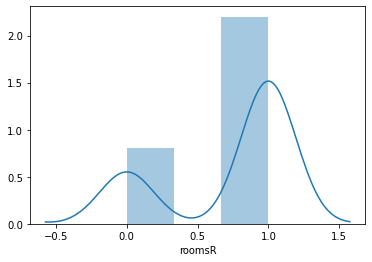

In [58]:
sns.distplot(covid19_homeless_impact_WR2_py['roomsR'])

Recoding 'rooms_occupied' into a categorical variable

In [59]:
def rooms_Occ (series): 
    if series <= 1000:
        return 0
    if series > 1000: 
        return 1

In [60]:
covid19_homeless_impact_WR2_py['rooms_occupiedR'] = covid19_homeless_impact_WR2_py['rooms_occupied'].apply(rooms_Occ)

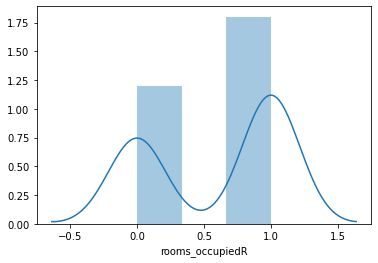

In [61]:
sns.distplot(covid19_homeless_impact_WR2_py['rooms_occupiedR'])

### 4b: Create a Contingency Table

In [62]:
covid19_homeless_impact_WR2_py_CrossTab = pd.crosstab(covid19_homeless_impact_WR2_py['roomsR'], covid19_homeless_impact_WR2_py['rooms_occupiedR'])

In [63]:
covid19_homeless_impact_WR2_py_CrossTab

rooms_occupiedR,0,1
roomsR,,
0,24,0
1,12,54


### 4c: Running the Independent Chi-Square

In [64]:
scipy.stats.chi2_contingency(covid19_homeless_impact_WR2_py_CrossTab)


(45.74100378787879,
 1.3496777680296932e-11,
 1,
 array([[ 9.6, 14.4],
        [26.4, 39.6]]))

### 4d: Test the Assumption of 5 Cases per Expected Cell

Looking at the array values. all of these values are over 5, this means that the assumption has been met.

# Q2:Online source has stated that the homeless population was hit 80% harder compared to the public. 

We'll work with "covid19_homeless_impact_WR2_py" dataset.

### 1- We'll need to get the total number of 'cumulative_homeless_cases' up to date and the 'cumulative_general_public_cases'

In [65]:
covid19_homeless_impact_WR2_py.cumulative_homeless_cases.tail()

85    244.0
86    246.0
87    246.0
88    246.0
89    246.0
Name: cumulative_homeless_cases, dtype: float64

In [66]:
covid19_homeless_impact_WR2_py.cumulative_general_public_cases.tail()

85    5688.0
86    5776.0
87    5819.0
88    5951.0
89    6177.0
Name: cumulative_general_public_cases, dtype: float64

# 2- Run the Analysis

### Run Goodness of Fit Chi-Squares Analysis

In [67]:
observed_values = np.array([246, 6177])

In [68]:
expected_values = np.array([5138, 1285])

In [69]:
scipy.stats.chisquare(observed_values, f_exp=expected_values)


Power_divergenceResult(statistic=23281.641158803028, pvalue=0.0)

P value is less than .05 then there is a signifcant difference between the survey and the actual data. 

to get the exact precentage for both populatioin. we'll run the two proportion z test to compare the proportions of the homeless_cases & the general_public_cases categories to the whole.

### Run wo proportion z test Analysis

There are 9,784 homesless_population and 873,521 general_public_population in San Francisco, 
Off the homesless_population 246 are covid19 postive cases, Off the general_public_population 6177 are covid19 postive cases.

In [87]:
count = np.array([246, 6177])
nobs = np.array([9784, 873521])
stat, pval = sp.proportions_ztest(count, nobs)
print(stat,pval)

20.922324827881948 3.353606264543243e-97
